Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing data file

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
cols= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_encode = pd.get_dummies(df, columns = cols, drop_first= True).astype(int)
print(df_encode)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2             1   
1    12250000  8960         4          4        4        3             1   
2    12250000  9960         3          2        2        2             1   
3    12215000  7500         4          2        2        3             1   
4    11410000  7420         4          1        2        2             1   
..        ...   ...       ...        ...      ...      ...           ...   
540   1820000  3000         2          1        1        2             1   
541   1767150  2400         3          1        1        0             0   
542   1750000  3620         2          1        1        0             1   
543   1750000  2910         3          1        1        0             0   
544   1750000  3850         3          1        2        0             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0        

In [6]:
from sklearn.model_selection import train_test_split

x= df_encode.drop(columns =['price'], axis=1)
y= df_encode['price']

In [7]:
print(x)

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0    7420         4          2        3        2             1              0   
1    8960         4          4        4        3             1              0   
2    9960         3          2        2        2             1              0   
3    7500         4          2        2        3             1              0   
4    7420         4          1        2        2             1              1   
..    ...       ...        ...      ...      ...           ...            ...   
540  3000         2          1        1        2             1              0   
541  2400         3          1        1        0             0              0   
542  3620         2          1        1        0             1              0   
543  2910         3          1        1        0             0              0   
544  3850         3          1        2        0             1              0   

     basement_yes  hotwater

In [8]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int32


In [9]:
x_train,x_test,y_train,y_test =train_test_split (x,y,test_size= 0.2, random_state=42)

shape of x_train, x_test, y_train, y_test

In [10]:
print (f"""
    x_train shape:  {x_train.shape}
    x_test shape: {x_test.shape}
    y_train shape: {y_train.shape}
    y_test shape: {y_test.shape}
    """
    )


    x_train shape:  (436, 13)
    x_test shape: (109, 13)
    y_train shape: (436,)
    y_test shape: (109,)
    


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             545 non-null    int32
 1   bedrooms                         545 non-null    int32
 2   bathrooms                        545 non-null    int32
 3   stories                          545 non-null    int32
 4   parking                          545 non-null    int32
 5   mainroad_yes                     545 non-null    int32
 6   guestroom_yes                    545 non-null    int32
 7   basement_yes                     545 non-null    int32
 8   hotwaterheating_yes              545 non-null    int32
 9   airconditioning_yes              545 non-null    int32
 10  prefarea_yes                     545 non-null    int32
 11  furnishingstatus_semi-furnished  545 non-null    int32
 12  furnishingstatus_unfurnished     545 non-null    i

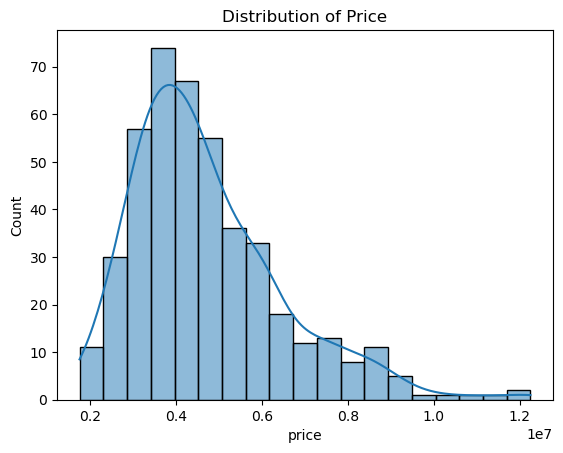

In [12]:
sns.histplot(y_train,kde=True)
plt.title("Distribution of Price")
plt.show()

In [13]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
print(y_train)
print(y_test)

46     15.833742
93     15.656060
335    15.181602
412    15.048071
471    14.917451
         ...    
71     15.725794
106    15.633587
270    15.283385
435    15.006398
102    15.639253
Name: price, Length: 436, dtype: float64
316    15.216694
77     15.710128
360    15.126543
90     15.678039
493    14.845130
         ...    
15     16.023785
357    15.143381
39     15.883638
54     15.810211
155    15.525699
Name: price, Length: 109, dtype: float64


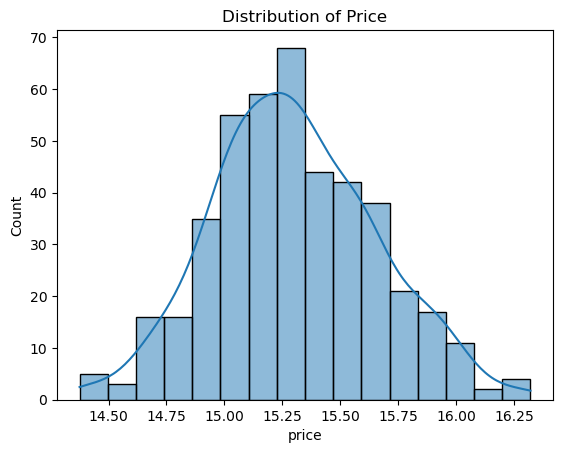

In [14]:
sns.histplot(y_train,kde=True)
plt.title("Distribution of Price")
plt.show()

In [15]:
x_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,5900,4,2,2,1,0,0,1,0,0,0,0,1
77,6500,3,2,3,0,1,0,0,0,1,1,0,0
360,4040,2,1,1,0,1,0,0,0,0,0,1,0
90,5000,3,1,2,0,1,0,0,0,1,0,1,0
493,3960,3,1,1,0,1,0,0,0,0,0,0,0


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 46 to 102
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             436 non-null    int32
 1   bedrooms                         436 non-null    int32
 2   bathrooms                        436 non-null    int32
 3   stories                          436 non-null    int32
 4   parking                          436 non-null    int32
 5   mainroad_yes                     436 non-null    int32
 6   guestroom_yes                    436 non-null    int32
 7   basement_yes                     436 non-null    int32
 8   hotwaterheating_yes              436 non-null    int32
 9   airconditioning_yes              436 non-null    int32
 10  prefarea_yes                     436 non-null    int32
 11  furnishingstatus_semi-furnished  436 non-null    int32
 12  furnishingstatus_unfurnished     436 non-null    int32

In [17]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 316 to 155
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             109 non-null    int32
 1   bedrooms                         109 non-null    int32
 2   bathrooms                        109 non-null    int32
 3   stories                          109 non-null    int32
 4   parking                          109 non-null    int32
 5   mainroad_yes                     109 non-null    int32
 6   guestroom_yes                    109 non-null    int32
 7   basement_yes                     109 non-null    int32
 8   hotwaterheating_yes              109 non-null    int32
 9   airconditioning_yes              109 non-null    int32
 10  prefarea_yes                     109 non-null    int32
 11  furnishingstatus_semi-furnished  109 non-null    int32
 12  furnishingstatus_unfurnished     109 non-null    int3

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaler_num = scaler.fit_transform (x_train[['area','bedrooms', 'bathrooms', 'stories', 'parking']])

x_test_scaler_num = scaler.transform (x_test[['area','bedrooms', 'bathrooms', 'stories', 'parking']])

In [20]:
x_train_scaler_num = pd.DataFrame(x_train_scaler_num, columns = ['area','bedrooms', 'bathrooms', 'stories', 'parking'], index = x_train.index)
x_test_scaler_num = pd.DataFrame(x_test_scaler_num, columns = ['area','bedrooms', 'bathrooms', 'stories', 'parking'], index = x_test.index)

In [21]:
print(x_train_scaler_num)


         area  bedrooms  bathrooms   stories   parking
46   0.384168  0.055271   1.539173  2.587644  0.367957
93   0.929181  0.055271   1.539173 -0.912499  2.709987
335 -0.607755 -1.283514  -0.557950 -0.912499  1.538972
412 -1.155492  0.055271  -0.557950  0.254215 -0.803059
471 -0.637730  0.055271  -0.557950  0.254215 -0.803059
..        ...       ...        ...       ...       ...
71   0.384168  1.394055   1.539173  2.587644 -0.803059
106  0.134371  1.394055   1.539173 -0.912499 -0.803059
270 -0.297097  0.055271   1.539173  1.420929  0.367957
435 -0.506019 -1.283514  -0.557950 -0.912499 -0.803059
102  0.157080  0.055271   1.539173  2.587644  0.367957

[436 rows x 5 columns]


In [22]:
print(x_test_scaler_num)

         area  bedrooms  bathrooms   stories   parking
316  0.338750  1.394055   1.539173  0.254215  0.367957
77   0.611257  0.055271   1.539173  1.420929 -0.803059
360 -0.506019 -1.283514  -0.557950 -0.912499 -0.803059
90  -0.070009  0.055271  -0.557950  0.254215 -0.803059
493 -0.542353  0.055271  -0.557950 -0.912499 -0.803059
..        ...       ...        ...       ...       ...
15   0.384168  1.394055  -0.557950  0.254215  1.538972
357  0.806553  1.394055  -0.557950  0.254215  0.367957
39   0.384168  1.394055   1.539173  2.587644  0.367957
54   0.384168  0.055271   1.539173  0.254215  0.367957
155  0.429586  0.055271   1.539173 -0.912499  1.538972

[109 rows x 5 columns]


In [23]:
categorical_cols = [
    'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
    'airconditioning_yes', 'prefarea_yes',
    'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'
]

In [24]:
x_train_final =pd.concat([x_train_scaler_num, x_train[categorical_cols]],axis =1)

x_test_final = pd.concat([x_test_scaler_num, x_test[categorical_cols]], axis =1)

In [25]:
x_test_final.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,0.338750,1.394055,1.539173,0.254215,0.367957,0,0,1,0,0,0,0,1
77,0.611257,0.055271,1.539173,1.420929,-0.803059,1,0,0,0,1,1,0,0
360,-0.506019,-1.283514,-0.557950,-0.912499,-0.803059,1,0,0,0,0,0,1,0
90,-0.070009,0.055271,-0.557950,0.254215,-0.803059,1,0,0,0,1,0,1,0
493,-0.542353,0.055271,-0.557950,-0.912499,-0.803059,1,0,0,0,0,0,0,0


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_final,y_train)

LinearRegression()

In [30]:
y_pred_log = model.predict(x_test_final)

In [31]:
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [33]:
from sklearn.metrics import mean_squared_error,  r2_score
mse= mean_squared_error(y_pred_actual,y_test_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred_actual,y_test_actual)

In [37]:
print(f"RSME : {rmse : ,.2f}")
print(f"R2 Score : {r2:,.3f}")


RSME :  1,314,648.20
R2 Score : 0.339


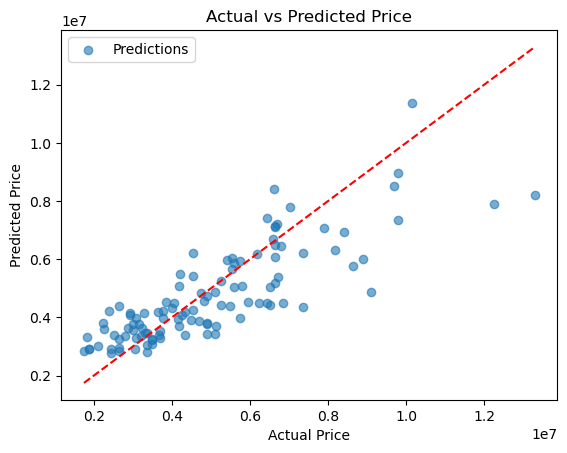

In [38]:
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6, label='Predictions')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--')  # Line for perfect prediction
plt.legend()
plt.show()